# Terror Activities Analysis 

In this project, we are examining patterns, trends and characteristics of various terrorist incidents. This can include factors such as location, type of attack, casualty and more. By conducting such analysis researchers, security experts can gain insights into the nature of terrorism, potential risk factors.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format

## Loading the dataset

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
df.head()

C:\Users\atulp\AppData\Local\Temp\ipykernel_25428\3753895702.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Shape of Dataset

In [3]:
df.shape

(181691, 135)

There are 181691 rows of data and 135 columns of data in the dataset.

## Columns in Dataset

In [4]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

As we can see that there are so many columns in this dataset, so lets fetch some important columns for further Analysis.

## Fetching Important Columns

In [5]:
cols=list(df.columns)
cols=['iyear','imonth','iday', 'country_txt','region_txt','provstate','city','latitude','longitude','attacktype1_txt',
      'target1','targtype1_txt','nkill','nwound','weaptype1_txt','gname','summary']
df=df[cols]

## Converting New dataframe to excel 

In [6]:
df.to_excel('GlobalTerrorism.xlsx',index=False)

## Loading the New saved excel file

In [7]:
df=pd.read_excel('GlobalTerrorism.xlsx')
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,target1,targtype1_txt,nkill,nwound,weaptype1_txt,gname,summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.46,-69.95,Assassination,Julio Guzman,Private Citizens & Property,1.00,0.00,Unknown,MANO-D,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.37,-99.09,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),0.00,0.00,Unknown,23rd of September Communist League,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.48,120.60,Assassination,Employee,Journalists & Media,1.00,0.00,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,38.00,23.76,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),NaN,NaN,Explosives,Unknown,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.58,130.40,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),NaN,NaN,Incendiary,Unknown,NaN


## Renaming the columns name for better understanding

In [8]:
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                      'region_txt':'region','attacktype1_txt':'Attack Type','target1':'Target','targettype1_txt':'Target Type',
                      'nkill':'No of Killed','nwound':'No of wounded','weaptype1_txt':'Weapon Type','gname':'Group Name'})


In [9]:
df.head()

,Year,Month,Day,Country,region,State,city,latitude,longitude,Attack Type,Target,targtype1_txt,No of Killed,No of wounded,Weapon Type,Group Name,summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.46,-69.95,Assassination,Julio Guzman,Private Citizens & Property,1.00,0.00,Unknown,MANO-D,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.37,-99.09,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),0.00,0.00,Unknown,23rd of September Communist League,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.48,120.60,Assassination,Employee,Journalists & Media,1.00,0.00,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,38.00,23.76,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),NaN,NaN,Explosives,Unknown,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.58,130.40,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),NaN,NaN,Incendiary,Unknown,NaN


So, we have now renamed the columns name for better understanding.

## Checking For Duplicate Data

In [10]:
df.duplicated().any()

True

So, we have Duplicate Data in our dataset, let's check how many duplicate rows we have in our dataset.

## Checking Count of duplicates rows

In [11]:
df.loc[df.duplicated()==True].shape

(9504, 17)

So, we have 9504 Duplicate rows in our dataset, let's delete all duplicates rows.

## Deleting Duplicates rows

In [12]:
df=df.drop_duplicates()
df.shape

(172187, 17)

## Checking for Null counts in our dataframe

In [13]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
region               0
State              421
city               435
latitude          4011
longitude         4012
Attack Type          0
Target             546
targtype1_txt        0
No of Killed      9433
No of wounded    15267
Weapon Type          0
Group Name           0
summary          59092
dtype: int64

### Finding Median values for No of killed and No of wounded columns

In [14]:
mid=df['No of Killed'].median()
print(f'Median of no. of killed:{mid}')
mid2=df['No of wounded'].median()
print(f'Median of no. of wounded:{mid2}')

Median of no. of killed:1.0
Median of no. of wounded:0.0


### Filling Null values in No of killed and No of wounded columns

In [15]:
df['No of Killed']=df['No of Killed'].fillna(mid)
df['No of wounded']=df['No of wounded'].fillna(mid2)

## Basic Information of Dataframe

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172187 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           172187 non-null  int64  
 1   Month          172187 non-null  int64  
 2   Day            172187 non-null  int64  
 3   Country        172187 non-null  object 
 4   region         172187 non-null  object 
 5   State          171766 non-null  object 
 6   city           171752 non-null  object 
 7   latitude       168176 non-null  float64
 8   longitude      168175 non-null  float64
 9   Attack Type    172187 non-null  object 
 10  Target         171641 non-null  object 
 11  targtype1_txt  172187 non-null  object 
 12  No of Killed   172187 non-null  float64
 13  No of wounded  172187 non-null  float64
 14  Weapon Type    172187 non-null  object 
 15  Group Name     172187 non-null  object 
 16  summary        113095 non-null  object 
dtypes: float64(4), int64(3), object(10

As we can see that datatype of 'No of killed' and 'No of wounded' is Float and count of death and wounded person can't be in float. So let's convert it into int datatype.

## Converting No of killed and No of wounded Columns to int datatype

In [17]:
df['No of Killed']=df['No of Killed'].astype(int)
df['No of wounded']=df['No of wounded'].astype(int)

## Max Destructive Data from Important Columns

In [18]:
print(f'Year which has the Maximum Number of Terror Attack: {df["Year"].value_counts().idxmax()}')
print(f'Month which has the Maximum Number of Terror Attack: {df["Month"].value_counts().idxmax()}')
print(f'Country which has the Maximum Number of Terror Attack: {df["Country"].value_counts().idxmax()}')
print(f'Region which has the Maximum Number of Terror Attack: {df["region"].value_counts().idxmax()}')
print(f'State which has the Maximum Number of Terror Attack: {df["State"].value_counts().idxmax()}')
print(f'Attack Type which is used in the Maximum Number of Terror Attack: {df["Attack Type"].value_counts().idxmax()}')
print(f'Type of Weapon used in the Maximum Terror Attack: {df["Weapon Type"].value_counts().idxmax()}')
print(f'Group involved in Maximum Number of Terror Attack: {df["Group Name"].value_counts().idxmax()}')

Year which has the Maximum Number of Terror Attack: 2014
Month which has the Maximum Number of Terror Attack: 5
Country which has the Maximum Number of Terror Attack: Iraq
Region which has the Maximum Number of Terror Attack: Middle East & North Africa
State which has the Maximum Number of Terror Attack: Baghdad
Attack Type which is used in the Maximum Number of Terror Attack: Bombing/Explosion
Type of Weapon used in the Maximum Terror Attack: Explosives
Group involved in Maximum Number of Terror Attack: Unknown


## Word Cloud of Attack Type

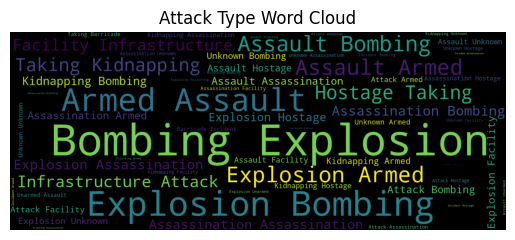

In [19]:
from wordcloud import WordCloud
attack_type_text=' '.join(df['Attack Type'].dropna())
word_cloud=WordCloud(width=1500, height=600, background_color='black').generate(attack_type_text)
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Attack Type Word Cloud')
plt.show()


## Word Cloud of Groups

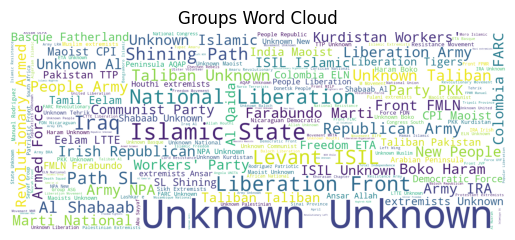

In [20]:
from wordcloud import WordCloud
groups=' '.join(df['Group Name'].dropna())
cloud=WordCloud(height=600,width=1500,background_color='white').generate(groups)
plt.axis('off')
plt.title('Groups Word Cloud')
plt.imshow(cloud)
plt.show()

## Year wise Terror Count

In [21]:
year_df=df.groupby('Year').agg(
    terror_count=('Year','count')
).sort_values(by='Year',ascending=True)
year_df=year_df.reset_index()
year_df.head()

,Year,terror_count
0,1970,643
1,1971,460
2,1972,531
3,1973,470
4,1974,576


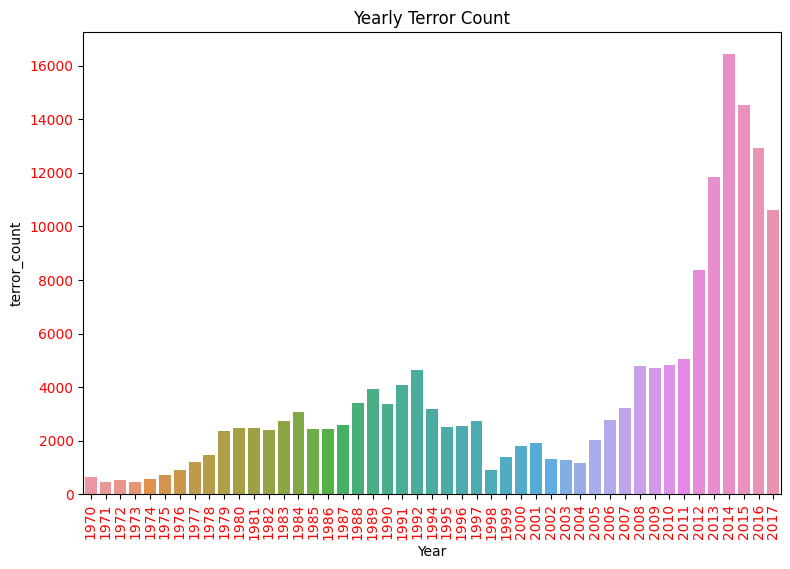

In [22]:
plt.figure(figsize=(9,6))
sns.barplot(data=year_df,x='Year',y='terror_count')
plt.xticks(rotation=90,color='red')
plt.yticks(color='red')
plt.title('Yearly Terror Count')
plt.show()


So, we can see that there are maximum terror attack in the year 2014 followed by 2015 and 2016.

## Region Wise Terror Counts

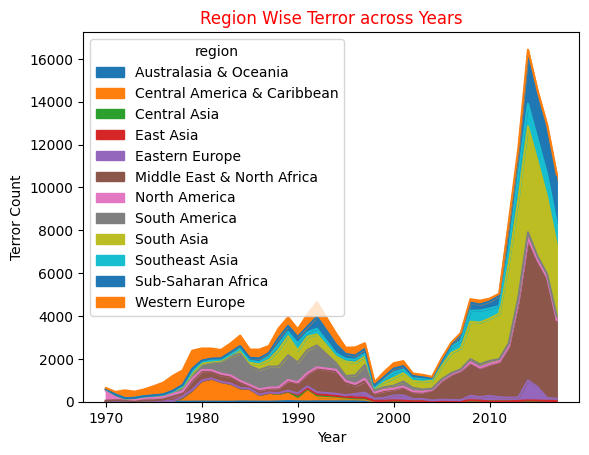

In [23]:
pd.crosstab(df['Year'],df['region']).plot(kind='area')
plt.title('Region Wise Terror across Years',color='red')
plt.ylabel('Terror Count')
plt.show()

## Top 10 Terror Attacked Countries

In [24]:
country_df=df.groupby('Country').agg(
    Terror_count=('Country','count')
).sort_values(by='Terror_count',ascending=False).head(10)
country_df=country_df.reset_index()
country_df

,Country,Terror_count
0,Iraq,23458
1,Pakistan,13795
2,Afghanistan,12512
3,India,11585
4,Colombia,7504
5,Philippines,6771
6,Peru,5048
7,United Kingdom,4998
8,El Salvador,4305
9,Somalia,4121


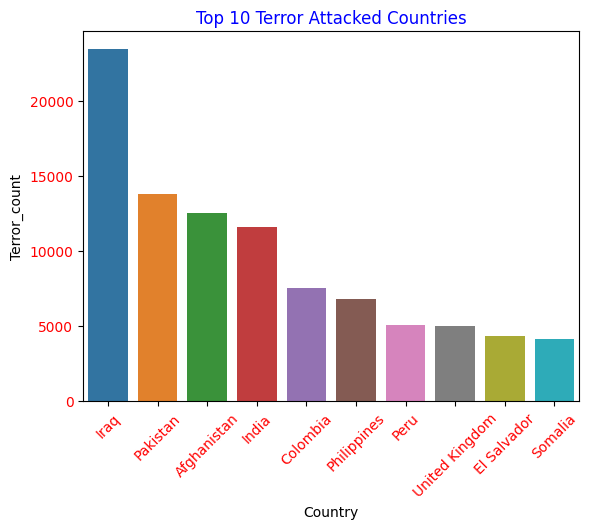

In [25]:
sns.barplot(data=country_df,x='Country',y='Terror_count')
plt.title('Top 10 Terror Attacked Countries',color='blue')
plt.xticks(rotation=45,color='red')
plt.yticks(color='red')
plt.show()

## Finding Casualty

In [26]:
df['casualty']=df['No of Killed']+df['No of wounded']
df.head()

,Year,Month,Day,Country,region,State,city,latitude,longitude,Attack Type,Target,targtype1_txt,No of Killed,No of wounded,Weapon Type,Group Name,summary,casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.46,-69.95,Assassination,Julio Guzman,Private Citizens & Property,1,0,Unknown,MANO-D,NaN,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.37,-99.09,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),0,0,Unknown,23rd of September Communist League,NaN,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.48,120.60,Assassination,Employee,Journalists & Media,1,0,Unknown,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,38.00,23.76,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),1,0,Explosives,Unknown,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.58,130.40,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),1,0,Incendiary,Unknown,NaN,1


## Casualty Count country-wise in particular year

In [27]:
casualty_df=pd.crosstab(index=df['Country'],columns=df['Year'],values=df['casualty'],aggfunc='count').fillna(0)
casualty_df.head(10)

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,...,414.00,503.00,542.00,418.00,1466.00,1418.00,1792.00,1832.00,1584.00,1395.00
Albania,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,2.00,4.00,2.00,1.00
Algeria,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,...,107.00,108.00,100.00,15.00,41.00,22.00,13.00,16.00,9.00,14.00
Andorra,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,3.00,...,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,6.00
Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,21.00,7.00,13.00,60.00,71.00,38.00,54.00,17.00,23.00,16.00,...,0.00,1.00,5.00,1.00,2.00,2.00,1.00,1.00,2.00,3.00
Armenia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00,2.00,0.00
Australia,1.00,1.00,5.00,0.00,1.00,0.00,0.00,0.00,2.00,2.00,...,3.00,1.00,1.00,0.00,0.00,1.00,8.00,14.00,9.00,4.00


## Checking Casualty of India and Pakistan using loc function

In [28]:
casualty_df.loc[['India','Pakistan']]

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
India,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,20.00,...,521.00,671.00,663.00,638.00,596.00,681.00,850.00,867.00,1019.00,964.00
Pakistan,1.00,0.00,0.00,0.00,2.00,2.00,3.00,0.00,2.00,7.00,...,567.00,667.00,706.00,1006.00,1646.00,2202.00,2138.00,1222.00,860.00,706.00


## No of people killed and wounded in Terror Attack

In [32]:
print(f'No of people killed in terror attack:{df["No of Killed"].sum()}')
print(f'No of people wounded in terror attack:{df["No of wounded"].sum()}')
print(f'Total No of Casualty in terror attack:{df["casualty"].sum()}')

No of people killed in terror attack:417661
No of people wounded in terror attack:520820
Total No of Casualty in terror attack:938481


## Fetching Attack type and no of kills using loc 

In [36]:
df.loc[:,['Attack Type','No of Killed']]

,Attack Type,No of Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,1
4,Facility/Infrastructure Attack,1
...,...,...
181686,Armed Assault,1
181687,Bombing/Explosion,2
181688,Facility/Infrastructure Attack,0
181689,Bombing/Explosion,0


## Filteration of Data Based on Conditions

### Filter all those record where attack type is Bombing/Explosion

In [41]:
df.loc[df['Attack Type']=='Bombing/Explosion'].head()

,Year,Month,Day,Country,region,State,city,latitude,longitude,Attack Type,Target,targtype1_txt,No of Killed,No of wounded,Weapon Type,Group Name,summary,casualty
3,1970,1,0,Greece,Western Europe,Attica,Athens,38.00,23.76,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),1,0,Explosives,Unknown,NaN,1
7,1970,1,2,United States,North America,California,Oakland,37.79,-122.23,Bombing/Explosion,Edes Substation,Utilities,0,0,Explosives,Unknown,1/2/1970: Unknown perpetrators detonated explo...,0
10,1970,1,1,United States,North America,Wisconsin,Baraboo,43.47,-89.74,Bombing/Explosion,Badger Army ammo depot.,Military,0,0,Explosives,"Weather Underground, Weathermen",NaN,0
15,1970,1,10,East Germany (GDR),Eastern Europe,Berlin,Berlin,52.50,13.40,Bombing/Explosion,Jurists Ball (Palais au Frankturm),Government (General),1,0,Explosives,Commune 1,NaN,1
17,1970,1,12,United States,North America,New York,New York City,40.70,-73.93,Bombing/Explosion,James Madison High School,Educational Institution,0,0,Explosives,Black Nationalists,1/12/1970: Unknown perpetrators threw a pipe b...,0


### Filter all records where Target type is 'Military'

In [43]:
df.loc[df['targtype1_txt']=='Military'].head()

,Year,Month,Day,Country,region,State,city,latitude,longitude,Attack Type,Target,targtype1_txt,No of Killed,No of wounded,Weapon Type,Group Name,summary,casualty
8,1970,1,2,United States,North America,Wisconsin,Madison,43.08,-89.41,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",Military,0,0,Incendiary,New Year's Gang,"1/2/1970: Karl Armstrong, a member of the New ...",0
10,1970,1,1,United States,North America,Wisconsin,Baraboo,43.47,-89.74,Bombing/Explosion,Badger Army ammo depot.,Military,0,0,Explosives,"Weather Underground, Weathermen",NaN,0
11,1970,1,6,United States,North America,Colorado,Denver,39.76,-104.88,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",Military,0,0,Incendiary,Left-Wing Militants,1/6/1970: Unknown perpetrators threw a Molotov...,0
16,1970,1,11,Ethiopia,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,Unknown,Soldier,Military,1,0,Unknown,Eritrean Liberation Front,NaN,1
23,1970,1,19,United States,North America,Washington,Seattle,47.61,-122.33,Bombing/Explosion,Air Force R.O.T.C. at the University of Washin...,Military,0,0,Explosives,Student Radicals,1/17/1970: Silas and Judith Bissell placed an ...,0


### Filter all those records where Weapon type is Explosives

In [45]:
df.loc[df['Weapon Type']=='Explosives'].head()

,Year,Month,Day,Country,region,State,city,latitude,longitude,Attack Type,Target,targtype1_txt,No of Killed,No of wounded,Weapon Type,Group Name,summary,casualty
3,1970,1,0,Greece,Western Europe,Attica,Athens,38.00,23.76,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),1,0,Explosives,Unknown,NaN,1
7,1970,1,2,United States,North America,California,Oakland,37.79,-122.23,Bombing/Explosion,Edes Substation,Utilities,0,0,Explosives,Unknown,1/2/1970: Unknown perpetrators detonated explo...,0
10,1970,1,1,United States,North America,Wisconsin,Baraboo,43.47,-89.74,Bombing/Explosion,Badger Army ammo depot.,Military,0,0,Explosives,"Weather Underground, Weathermen",NaN,0
15,1970,1,10,East Germany (GDR),Eastern Europe,Berlin,Berlin,52.50,13.40,Bombing/Explosion,Jurists Ball (Palais au Frankturm),Government (General),1,0,Explosives,Commune 1,NaN,1
17,1970,1,12,United States,North America,New York,New York City,40.70,-73.93,Bombing/Explosion,James Madison High School,Educational Institution,0,0,Explosives,Black Nationalists,1/12/1970: Unknown perpetrators threw a pipe b...,0


## Top 5 Most Target Agencies

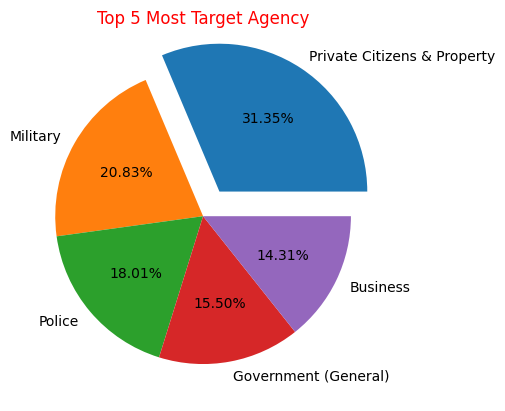

In [70]:
plt.pie(df['targtype1_txt'].value_counts().head(5),labels=df['targtype1_txt'].value_counts().head(5).index,
        autopct='%.2f%%',explode=[0.2,0,0,0,0])
plt.title('Top 5 Most Target Agency',color='red')
plt.show()

Most targetted Agency is private citizens and property

## Mostly used weapon in terror attacks

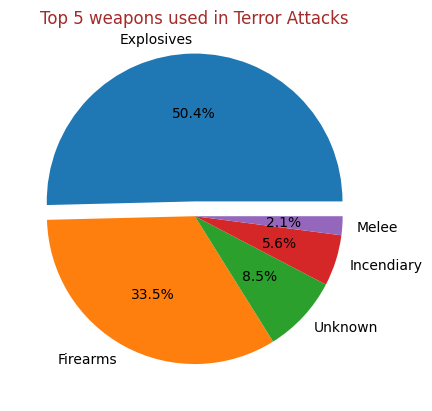

In [73]:
plt.pie(df['Weapon Type'].value_counts().head(5),labels=df['Weapon Type'].value_counts().head(5).index,
        autopct='%.1f%%',explode=[0.1,0,0,0,0])
plt.title('Top 5 weapons used in Terror Attacks',color='brown')
plt.show()

Most used Weapon in terror attacks is explosives followed by firearms.

## Top terror attacks Groups

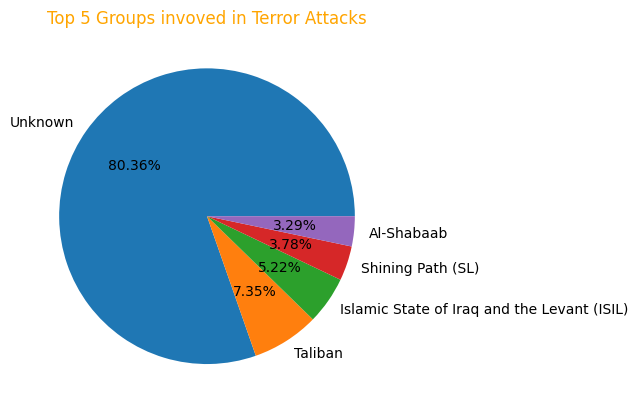

In [77]:
plt.pie(df['Group Name'].value_counts().head(),labels=df['Group Name'].value_counts().head().index,
        autopct='%.2f%%')
plt.title('Top 5 Groups invoved in Terror Attacks',color='orange')
plt.show()

In most terror attacks group involved in the terror attack is unknown followed by Taliban group involved in 7.35% of terror attacks